In [1]:
# https://stable-baselines3.readthedocs.io/en/master/guide/rl.html
# https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html#a-taxonomy-of-rl-algorithms
# https://gymnasium.farama.org/content/basic_usage/

In [8]:
import warnings
warnings.filterwarnings('ignore')

### 1. Import dependencies

In [9]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv # vec multiple environments
from stable_baselines3.common.evaluation import evaluate_policy  # test how it performs

import matplotlib.pyplot as plt

### 2. Load Enviroment

In [10]:
environment_name = "CartPole-v1"

In [11]:
# Erstelle eine Environment
env = gym.make(environment_name, render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [12]:
# env.reset() setzt die Umgebung zurück und gibt ihren Anfangszustand zurück.
obs = env.reset() 
obs

(array([-0.0417932 , -0.00236392, -0.02723532, -0.04213806], dtype=float32),
 {})

In [13]:
# env.observation_space.sample() gibt einen zufälligen Zustand aus dem Beobachtungsraum der Umgebung zurück
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([-4.7337174e+00,  9.7697152e+37,  1.6592143e-01, -1.8146384e+38],
      dtype=float32)

In [11]:
env.observation_space.shape

(4,)

In [12]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")

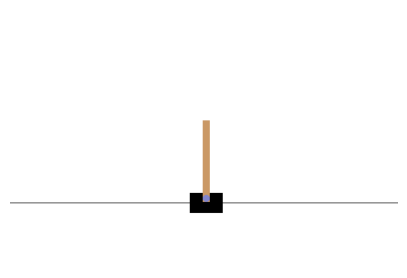

In [10]:
#plot_environment(env)
#plt.show()

In [10]:
env.action_space

Discrete(2)

In [11]:
env.action_space.sample() # 0 oder 1

0

In [12]:
"""
    Laut OpenAI:
    observation, reward, terminated, truncated, info = env.step(action)
    truncated, um anzuzeigen, ob der Schritt aufgrund einer Zeitbegrenzung abgeschnitten wurde.
"""
env.step(env.action_space.sample())

(array([ 0.01154474,  0.19375527,  0.04104744, -0.30101094], dtype=float32),
 1.0,
 False,
 False,
 {})

In [9]:
episodes = 3
for episode in range(1, episodes+1):
    obs, info = env.reset()
    terminated= False
    score = 0
    
    while not terminated:
        env.render()
        action = env.action_space.sample()
        n_obs, reward, terminated, truncated, info = env.step(action)
        score+=reward
        print('Episode:{} Score:{}'.format(episode, score))
        print('Reward:{}'.format(reward))
env.close()  

Episode:1 Score:1.0
Reward:1.0
Episode:1 Score:2.0
Reward:1.0
Episode:1 Score:3.0
Reward:1.0
Episode:1 Score:4.0
Reward:1.0
Episode:1 Score:5.0
Reward:1.0
Episode:1 Score:6.0
Reward:1.0
Episode:1 Score:7.0
Reward:1.0
Episode:1 Score:8.0
Reward:1.0
Episode:1 Score:9.0
Reward:1.0
Episode:1 Score:10.0
Reward:1.0
Episode:1 Score:11.0
Reward:1.0
Episode:1 Score:12.0
Reward:1.0
Episode:1 Score:13.0
Reward:1.0
Episode:1 Score:14.0
Reward:1.0
Episode:1 Score:15.0
Reward:1.0
Episode:1 Score:16.0
Reward:1.0
Episode:1 Score:17.0
Reward:1.0
Episode:1 Score:18.0
Reward:1.0
Episode:1 Score:19.0
Reward:1.0
Episode:1 Score:20.0
Reward:1.0
Episode:1 Score:21.0
Reward:1.0
Episode:1 Score:22.0
Reward:1.0
Episode:1 Score:23.0
Reward:1.0
Episode:1 Score:24.0
Reward:1.0
Episode:1 Score:25.0
Reward:1.0
Episode:1 Score:26.0
Reward:1.0
Episode:1 Score:27.0
Reward:1.0
Episode:1 Score:28.0
Reward:1.0
Episode:1 Score:29.0
Reward:1.0
Episode:1 Score:30.0
Reward:1.0
Episode:1 Score:31.0
Reward:1.0
Episode:2 Score:1

In [10]:
env = gym.make(environment_name, render_mode="rgb_array")
observation, info = env.reset(seed=42)
score = 0
for _ in range(10):
    action = env.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = env.step(action)
    score+=reward
    print(f"Reward: {reward}.")
    print(f"Der Score: {score}.")  

    if terminated or truncated:
        observation, info = env.reset()
        

env.close()

Reward: 1.0.
Der Score: 1.0.
Reward: 1.0.
Der Score: 2.0.
Reward: 1.0.
Der Score: 3.0.
Reward: 1.0.
Der Score: 4.0.
Reward: 1.0.
Der Score: 5.0.
Reward: 1.0.
Der Score: 6.0.
Reward: 1.0.
Der Score: 7.0.
Reward: 1.0.
Der Score: 8.0.
Reward: 1.0.
Der Score: 9.0.
Reward: 1.0.
Der Score: 10.0.


### Environment

https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [15]:
# 0-push cart to left, 1-push cart to the right
env.action_space.sample()

0

In [16]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample() 

array([ 2.3207095e+00, -1.0071462e+38,  3.6221817e-02,  4.3181848e+37],
      dtype=float32)

In [17]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

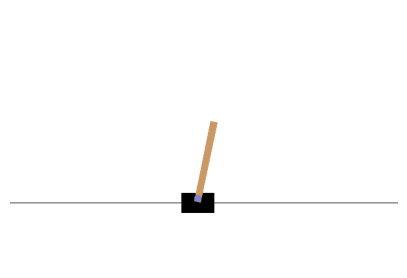

In [69]:
#plot_environment(env)
#plt.show()

### 3. Train the RL Model 

In [14]:
log_path = os.path.join('Training', 'Logs')
log_path

'Training/Logs'

In [19]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [20]:
#PPO??

In [85]:
model.learn(total_timesteps=20000)

Logging to Training/Logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 5944 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4217        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009269951 |
|    clip_fraction        | 0.0858      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00354     |
|    learning_rate        | 0.0003      |
|    loss                 | 8.59        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 55          |
-----------------------------------------
---

### 4. Save and reload Model

In [15]:
PPO_Path = os.path.join('Training', 'Saved Models', 'PPO_Molde_Cartpole')

In [89]:
model.save(PPO_Path)

In [22]:
del model

In [16]:
model = PPO.load(PPO_Path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### 5. Evaluation

In [15]:
# mean_reward, std_reward 
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(500.0, 0.0)

### 6. Test Model

In [17]:
vec_env = model.get_env()
obs = vec_env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    vec_env.render('human')
    if dones:
        print(f"Info: {info}")
        

Info: [{'episode': {'r': 500.0, 'l': 500, 't': 18.179603}, 'TimeLimit.truncated': True, 'terminal_observation': array([ 0.21435499,  0.05019521,  0.01371281, -0.03642039], dtype=float32)}]
Info: [{'episode': {'r': 500.0, 'l': 500, 't': 25.895147}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.32095718, -0.02391826, -0.005071  , -0.00709143], dtype=float32)}]


In [17]:
env.close()

In [18]:
vec_env.close()

### 7. viewing Logs in Tensorboard

In [20]:
training_log_path = os.path.join(log_path, 'PPO_1')

In [21]:
training_log_path

'Training/Logs/PPO_1'

In [22]:
!tensorboard --logdir={training_log_path}

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.15.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C


### 8. Adding a callback to the training stage

In [19]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [20]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')

In [21]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

In [22]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(env,
                            callback_on_new_best=stop_callback,
                            eval_freq=10000,
                            best_model_save_path=save_path,
                            verbose=1)

In [23]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [47]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training/Logs/PPO_3
-----------------------------
| time/              |      |
|    fps             | 7361 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 5306        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008320986 |
|    clip_fraction        | 0.0932      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.000964    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.61        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 53.6        |
-----------------------------------------
---

### 9. Changing Policies

In [48]:
net_arch = [dict(pi=[128, 128, 128, 128], vf=[128, 128, 128,128])]

model = PPO('MlpPolicy', env, verbose=1, policy_kwargs={'net_arch': net_arch})

model.learn(total_timesteps=20000, callback=eval_callback)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 6209 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3594        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015792694 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | -0.00572    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.32        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 18.9        |
-----------------------------------------
-----------------

### 10. Using an alternative Algorithm

In [5]:
from stable_baselines3 import DQN

In [24]:
model = DQN('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [51]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training/Logs/DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5939     |
|    time_elapsed     | 0        |
|    total_timesteps  | 123      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.906    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7835     |
|    time_elapsed     | 0        |
|    total_timesteps  | 197      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.865    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 9859     |
|    time_elapsed     | 0        |
|    total_timesteps  | 285      |
----------------------------------
------------------------

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 23485    |
|    time_elapsed     | 0        |
|    total_timesteps  | 2376     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 23760    |
|    time_elapsed     | 0        |
|    total_timesteps  | 2472     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 23998    |
|    time_elapsed     | 0        |
|    total_timesteps  | 2549     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 29279    |
|    time_elapsed     | 0        |
|    total_timesteps  | 4818     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 29423    |
|    time_elapsed     | 0        |
|    total_timesteps  | 4910     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 29521    |
|    time_elapsed     | 0        |
|    total_timesteps  | 4995     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 31833    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7244     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 31894    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7349     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 31926    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7417     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 32841    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9658     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 32885    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9740     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 32836    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9816     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 33273    |
|    time_elapsed     | 0        |
|    total_timesteps  | 12132    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 33308    |
|    time_elapsed     | 0        |
|    total_timesteps  | 12212    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 33317    |
|    time_elapsed     | 0        |
|    total_timesteps  | 12278    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 640      |
|    fps              | 33972    |
|    time_elapsed     | 0        |
|    total_timesteps  | 14622    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 644      |
|    fps              | 33977    |
|    time_elapsed     | 0        |
|    total_timesteps  | 14675    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 34053    |
|    time_elapsed     | 0        |
|    total_timesteps  | 14845    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 748      |
|    fps              | 34453    |
|    time_elapsed     | 0        |
|    total_timesteps  | 17083    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 752      |
|    fps              | 34472    |
|    time_elapsed     | 0        |
|    total_timesteps  | 17165    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 34456    |
|    time_elapsed     | 0        |
|    total_timesteps  | 17243    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 856      |
|    fps              | 34727    |
|    time_elapsed     | 0        |
|    total_timesteps  | 19434    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 860      |
|    fps              | 34724    |
|    time_elapsed     | 0        |
|    total_timesteps  | 19491    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 34789    |
|    time_elapsed     | 0        |
|    total_timesteps  | 19650    |
----------------------------------
----------------------------------
| rollout/          

In [21]:
dqn_path = os.path.join('Training', 'Saved Models', 'DQN_model')

In [53]:
model.save(dqn_path)

In [54]:
del model

In [22]:
model = DQN.load(dqn_path, env=env)

In [56]:
# mean_reward, std_reward 
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(9.4, 0.9165151389911681)

In [25]:
env = model.get_env()
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render('human')
    if dones:
        print(f"Info: {info}")
env.close()

Info: [{'TimeLimit.truncated': False, 'terminal_observation': array([-0.18630868, -1.9920446 ,  0.25127572,  3.062394  ], dtype=float32)}]
Info: [{'TimeLimit.truncated': False, 'terminal_observation': array([-0.12427451, -1.6139346 ,  0.21820222,  2.5795858 ], dtype=float32)}]
Info: [{'TimeLimit.truncated': False, 'terminal_observation': array([-0.09670125, -1.7165012 ,  0.21008526,  2.7980576 ], dtype=float32)}]
Info: [{'TimeLimit.truncated': False, 'terminal_observation': array([-0.21789494, -1.9217834 ,  0.25998548,  3.1129348 ], dtype=float32)}]
Info: [{'TimeLimit.truncated': False, 'terminal_observation': array([-0.22405152, -1.9884952 ,  0.21324573,  2.966526  ], dtype=float32)}]
Info: [{'TimeLimit.truncated': False, 'terminal_observation': array([-0.17651078, -1.7386075 ,  0.24372254,  2.827377  ], dtype=float32)}]
Info: [{'TimeLimit.truncated': False, 'terminal_observation': array([-0.15180404, -1.7983047 ,  0.2520112 ,  2.8242152 ], dtype=float32)}]
Info: [{'TimeLimit.truncate